# LINEAR REGRESSION WITH MULTIPLE VARIABLES

Linear Regression with multiple variables (also known as Multiple Linear Regression) is an extension of simple linear regression, where you predict an output variable y based on multiple input features x1, x2, x3 ...xn

Equation: 
The general form of Multiple Linear Regression is: 
#### y = c + m1X1 + m2X2 + m3X3....mnXn

Where :
y = predicted output 
c = intercept 
x = independent variables such as area , bedroom , age
m = coeficients

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Import data

In [4]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Handling the missing values

## filling the NaN with median

In [7]:
import math 
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [10]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [11]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [19]:
features = ["area", "bedrooms", "age"]

## plot each feature separately

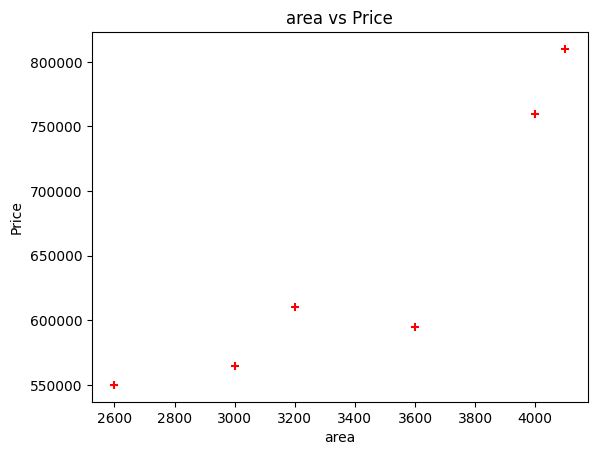

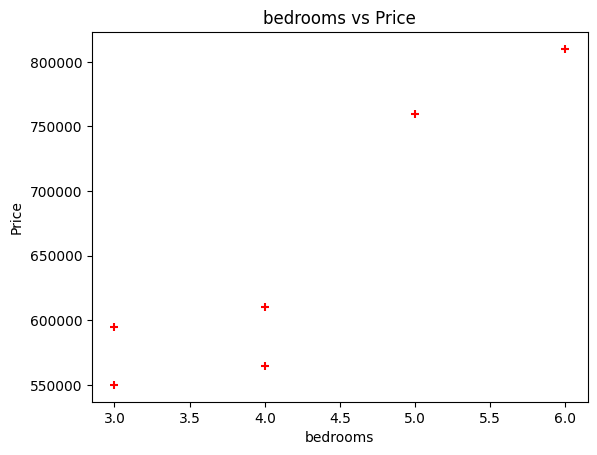

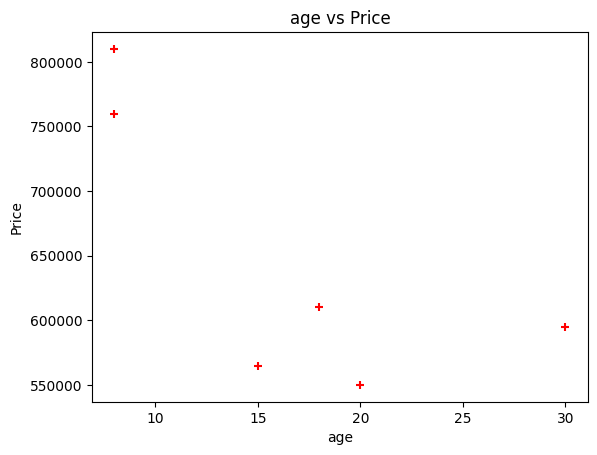

In [20]:
for feature in features:
    plt.scatter(df[feature], df["price"], color="red", marker="+")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"{feature} vs Price")
    plt.show()

## plot all feature in one graph

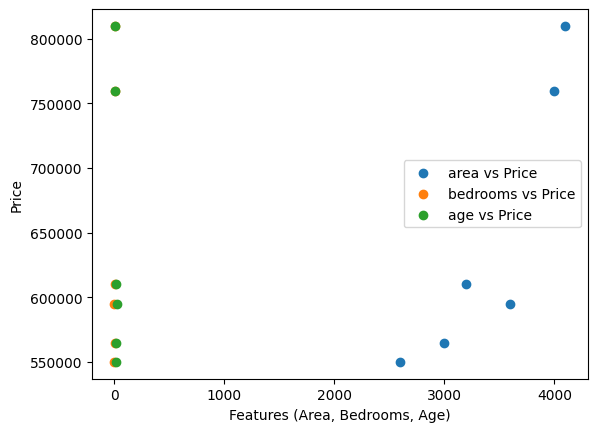

In [21]:
for feature in features:
    plt.scatter(df[feature], df["price"], label=f"{feature} vs Price")

plt.xlabel("Features (Area, Bedrooms, Age)")
plt.ylabel("Price")
plt.legend()
plt.show()

## creating model

In [12]:
model = LinearRegression()

In [31]:
X = df[['area', 'bedrooms', 'age']] # independent variables
y = df['price'] # Dependent variable

In [32]:
# fit method is used to train model with training set
# model.fit(independent variables, target variables) target variables = variables that we want to predict
# model.fit(df[['area','bedrooms','age']],df['price'])
model.fit(X,y)

LinearRegression()

In [33]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [34]:
model.intercept_

np.float64(221323.0018654043)

## now prediction

In [35]:
model.predict([[3000,3,40]])

C:\Users\Bibek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [36]:
model.predict([[2500,4,5]])

C:\Users\Bibek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [38]:
y_pred = model.predict(X)

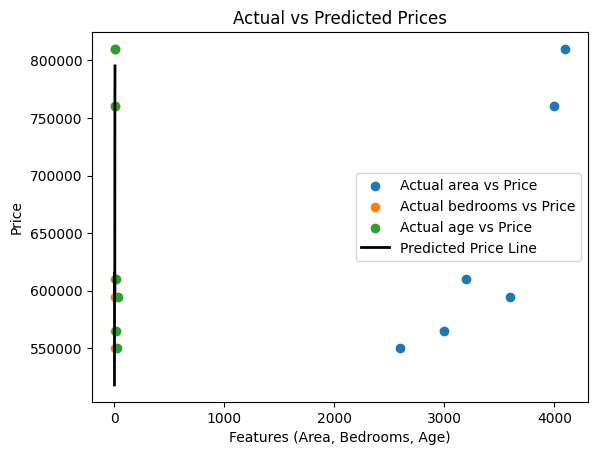

In [40]:
for feature in features:
    plt.scatter(df[feature], df["price"], label=f"Actual {feature} vs Price")
plt.plot(range(len(y_pred)), y_pred, color="black", linewidth=2, label="Predicted Price Line")
    

plt.xlabel("Features (Area, Bedrooms, Age)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()